In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi

import sys
sys.path.append('/home/adedapo/personal_project/daps05ayoade/disseration')


from algotrading.secrecy import API_KEY, SECRET_KEY, BASE_URL

In [3]:
trading_client = tradeapi.REST(API_KEY, SECRET_KEY, BASE_URL)

In [4]:
# Get account information
account = trading_client.get_account()

# Extract metrics
account_balance = account.cash
portfolio_value = account.portfolio_value
profit_or_loss = float(portfolio_value) - float(account_balance)
is_day_trader = account.pattern_day_trader
buying_power = account.buying_power

# Display the metrics
print(f"Account Balance: ${account_balance}")
print(f"Portfolio Value: ${portfolio_value}")
print(f"Profit/Loss: ${profit_or_loss}")
print(f"Is Day Trader: {is_day_trader}")
print(f"Buying Power: ${buying_power}")

Account Balance: $985634.03
Portfolio Value: $985634.03
Profit/Loss: $0.0
Is Day Trader: True
Buying Power: $3942536.12


In [29]:
import requests
import json

url = "https://paper-api.alpaca.markets/v2/account/portfolio/history"

headers = {
    "accept": "application/json",
    "APCA-API-KEY-ID": API_KEY,
    "APCA-API-SECRET-KEY": SECRET_KEY
}

response = requests.get(url, headers=headers)
data = response.json()

# Extract data
timestamps = data["timestamp"]
equity = data["equity"]
profit_loss = [x for x in data['profit_loss'] if x is not None]
profit_loss_pct = [x for x in data["profit_loss_pct"] if x is not None]*100

# Filter out null values and calculate metrics
equity = [x for x in equity if x is not None]
avg_equity = sum(equity) / len(equity)
total_profit_loss = sum(profit_loss)
total_profit_loss_pct = sum(profit_loss_pct)

# Display metrics
print(f"Average Equity: ${avg_equity:.2f}")
print(f"Total Profit/Loss: ${total_profit_loss:.2f}")
print(f"Total Percentage Profit/Loss: {total_profit_loss_pct:.2f}%")
print(f"Starting Equity: ${equity[0]:.2f}")
print(f"Ending Equity: ${equity[-1]:.2f}")

Average Equity: $996581.13
Total Profit/Loss: $-14365.97
Total Percentage Profit/Loss: -1.44%
Starting Equity: $1000000.00
Ending Equity: $985634.03


In [31]:
# 1. Volatility of Returns
volatility = np.std(profit_loss_pct)
print(f"Volatility of Returns (Std Dev): {volatility:.2f}%")

# 2. Max Drawdown
rolling_max = np.maximum.accumulate(equity)  # Computes the running maximum
daily_drawdown = (equity/rolling_max) - 1.0
max_daily_drawdown = np.min(daily_drawdown)
print(f"Max Daily Drawdown: {max_daily_drawdown:.2f}%")

Volatility of Returns (Std Dev): 0.00%
Max Daily Drawdown: -0.02%


In [33]:
import numpy as np

# Convert annual T-bill yield to daily rate
R_f_daily = (1 + 0.0528)**(1/252) - 1

# Calculate the average daily return
R_p_daily = np.mean(profit_loss_pct)

# Calculate portfolio volatility (daily)
sigma_p_daily = np.std(profit_loss_pct)

# Compute Sharpe Ratio
sharpe_ratio = (R_p_daily - R_f_daily) / sigma_p_daily
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Sharpe Ratio: -0.3960


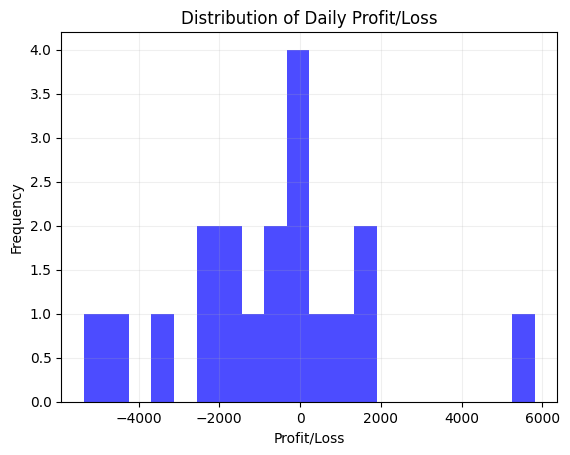

In [32]:
# 3. Daily Profit/Loss Distribution
plt.hist(profit_loss, bins=20, color='blue', alpha=0.7)
plt.title("Distribution of Daily Profit/Loss")
plt.xlabel("Profit/Loss")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.2)
plt.show()